In [6]:
from matplotlib import pyplot as plt
import numpy as np

In [137]:
# Yrityksen arvon kehitys yhdessä vuodessa
#  a: arvo vuoden alussa, euroa
#  r: tuotto vuodessa, prosenttia
#  p: perintöveron maksuerä vuodessa, euroa
def simulate_one(a, r, p):
    v = a * (r / 100)
    return a + v - p

# Yrityksen arvon kehitys useamman vuoden aikana
#  t: perintövero yhteensä, prosenttia
#  r: tuotto vuodessa, prosenttia
#  a: arvo alussa, euroa
#  N: kuinka monelle vuodelle perintövero jaetaan
#  M: kuinka monen vuoden päähän lasketaan
def simulate(t=7.6, r=15.0, a=1e7, N=10, M=12):
    p = a * (t / 100) / N
    aa = [a]
    for i in range(N):
        a = simulate_one(a, r, p)
        aa.append(a)
    for i in range(N, M):
        # N vuoden jälkeen perintövero on jo maksettu.
        a = simulate_one(a, r, 0)
        aa.append(a)
    return np.array(aa)

In [141]:
def simulate_batch(r):
    a0 = simulate( 0.0, r) / 1e6
    a1 = simulate( 7.6, r) / 1e6
    a2 = simulate(13.2, r) / 1e6
    x = np.array(list(range(12 + 1)))
    return x, a0, a1, a2

def find_intersects(x, a0, a1, a2):
    y = a0[10]
    x1 = np.interp(y, a1, x)
    x2 = np.interp(y, a2, x)
    return y, 10.0, x1, x2

def plot_trace(x, y, color="black"):
    plt.plot([x, x], [0, y], color=color, linewidth=1, linestyle=":", alpha=0.5)

def loss_to_str(years):
    months = int(years * 12)
    days = int(np.round(years * 360 - months * 30))
    return f"+{months}kk {days}pv"

def annotate_loss(x, y, color, delta):
    plt.plot([x, x], [y, y + delta], color=color, linewidth=1, linestyle=":")
    plt.gca().text(
        x,
        y + delta,
        loss_to_str(x - 10),
        verticalalignment=("top" if delta < 0 else "bottom"),
        horizontalalignment="center",
        fontsize=8,
        color=color
    )

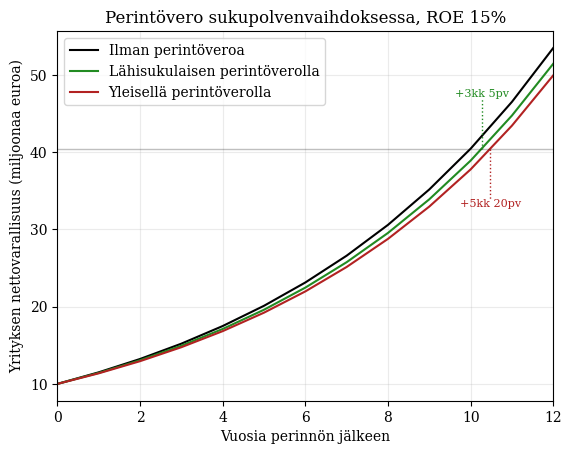

In [182]:
C0 = "black"
C1 = "forestgreen"
C2 = "firebrick"

L0 = "Ilman perintöveroa"
L1 = "Lähisukulaisen perintöverolla"
L2 = "Yleisellä perintöverolla"

r = 15.0
x, a0, a1, a2 = simulate_batch(r)
y, x0, x1, x2 = find_intersects(x, a0, a1, a2)

plt.plot(x, a0, color=C0, label=L0)
plt.plot(x, a1, color=C1, label=L1)
plt.plot(x, a2, color=C2, label=L2)
plt.axhline(y=y, color=C0, linewidth=1, alpha=0.25)
annotate_loss(x1, y, C1, +(y-8)/5)
annotate_loss(x2, y, C2, -(y-8)/5)
plt.xlim(0, 12)
plt.xlabel("Vuosia perinnön jälkeen")
plt.ylabel("Yrityksen nettovarallisuus (miljoonaa euroa)")
plt.title(f"Perintövero sukupolvenvaihdoksessa, ROE {r:.0f}%")
plt.legend()

In [168]:
def loss(r):
    _, x0, x1, x2 = find_intersects(*simulate_batch(r))
    return x1 - x0, x2 - x0

def losses(rr):
    d1 = []
    d2 = []
    for r in rr:
        a, b = loss(r)
        d1.append(a)
        d2.append(b)
    return np.array(d1), np.array(d2)

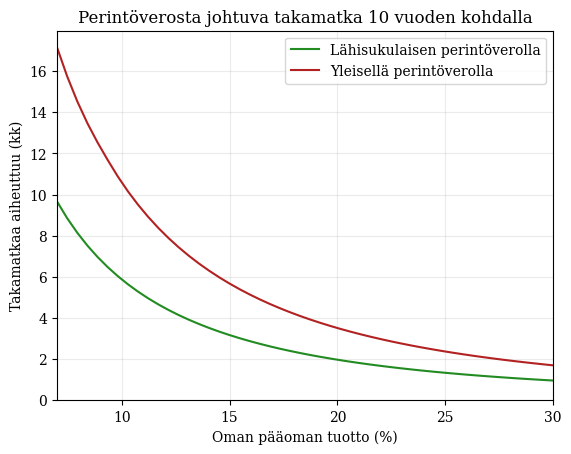

In [184]:
r = np.linspace(7, 30)
d1, d2 = losses(r)
plt.plot(r, 12 * d1, color=C1, label=L1)
plt.plot(r, 12 * d2, color=C2, label=L2)
plt.xlim(r[0], r[-1])
plt.ylim(0, None)
plt.xlabel("Oman pääoman tuotto (%)")
plt.ylabel("Takamatkaa aiheuttuu (kk)")
plt.title("Perintöverosta johtuva takamatka 10 vuoden kohdalla")
plt.legend()
plt.savefig("haitta-perintövero.png")